<a href="https://colab.research.google.com/github/LiuYiShan613/EDA/blob/main/Churns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 2019-2020
# 最後購買日、課程總金額、產品總金額
product_consumption = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/Course product consumption amount.csv')
# 每個會員這兩年購買次數
product_consumption_cnt = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/Number of consumption.csv')
# 完成臉部課程和身體課程的次數
done_course_count = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/Number of physical exercise classes.csv')
# 每個會員在這段期間內回店次數
visits_count = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/Number of visits.csv')
# 還剩下的課程堂數
Remaining_course_count = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/Remaining number of classes.csv')
# 轉店(更換消費分店)次數
Transfer_store = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/Transfer store.csv') 
# 客訴次數、回饋(call客=致電關心客人)次數
Customer_feedback = pd.read_csv('/content/drive/MyDrive/data/Churn Prediction DataSet/complain+call customer.csv')

# Data wrangling

In [ ]:
product_consumption['final_consumption_date'] = pd.to_datetime(product_consumption['final_consumption_date'])
product_consumption.info()

In [ ]:
Member_attributes = pd.DataFrame(product_consumption['member_code'].unique())
Member_attributes.columns = ['member_code']

Member_attributes = pd.merge(Member_attributes, product_consumption[['member_code', 'final_consumption_date', 'course_amount','product_amount']],on='member_code',how='left')
Member_attributes = pd.merge(Member_attributes, product_consumption_cnt[['member_code', 'consumption_num']],on='member_code',how='left')
Member_attributes = pd.merge(Member_attributes, done_course_count[['member_code', 'done_face_count', 'done_body_count']],on='member_code',how='left')
Member_attributes = pd.merge(Member_attributes, visits_count[['member_code', 'back_store_cnt']],on='member_code',how='left')
Member_attributes = pd.merge(Member_attributes, Remaining_course_count[['member_code', 'Remaining_face_course','Remaining_body_course']],on='member_code',how='left')
Member_attributes = pd.merge(Member_attributes, Transfer_store[['member_code', 'transfer_cnt']],on='member_code',how='left')
Member_attributes = pd.merge(Member_attributes, Customer_feedback[['member_code', 'complaints_cnt','CALL_cnt']],on='member_code',how='left')

# Add churns

### 如果最後回店日小於現在的日期超過365天，則認為他已流失

In [ ]:
from datetime import datetime, timedelta, date
now = datetime.now()
now = pd.to_datetime(now.strftime('%Y-%m-%d'))

Member_attributes['Churns'] = 0
Member_attributes.loc[(now-Member_attributes['final_consumption_date']).dt.days >365,"Churns"] = 1
Member_attributes

,member_code,final_consumption_date,course_amount,product_amount,consumption_num,done_face_count,done_body_count,back_store_cnt,Remaining_face_course,Remaining_body_course,transfer_cnt,complaints_cnt,CALL_cnt,Churns
0,9100000013183,2021-07-21,13946.0,4524.0,3.0,9.0,3.0,10,6.0,0.0,NaN,0.0,9.0,0
1,9100000021898,2021-08-27,9476.0,13580.0,7.0,3.0,6.0,13,0.0,0.0,NaN,NaN,NaN,0
2,9100000023069,2021-09-02,15479.0,1927.0,10.0,0.0,35.0,18,0.0,0.0,NaN,0.0,2.0,0
3,9100000219776,2020-11-02,2279.0,19320.0,5.0,3.0,16.0,11,2.0,0.0,NaN,NaN,NaN,1
4,9100000388762,2019-11-27,7719.0,5864.0,4.0,1.0,9.0,10,0.0,4.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7647,9100003057047,2021-08-13,3000.0,0.0,1.0,NaN,NaN,1,0.0,0.0,NaN,NaN,NaN,0
7648,9100003057054,2021-09-06,7440.0,557.0,1.0,0.0,1.0,1,1.0,5.0,NaN,NaN,NaN,0
7649,9100003057177,2021-02-04,3000.0,0.0,1.0,NaN,NaN,1,0.0,0.0,NaN,NaN,NaN,0
7650,9100003057306,2020-12-31,7440.0,557.0,1.0,NaN,NaN,1,1.0,6.0,NaN,NaN,NaN,1


In [ ]:
Member_attributes.isna().any()

member_code               False
final_consumption_date     True
course_amount             False
product_amount            False
consumption_num            True
done_face_count            True
done_body_count            True
back_store_cnt            False
Remaining_face_course      True
Remaining_body_course      True
transfer_cnt               True
complaints_cnt             True
CALL_cnt                   True
Churns                    False
dtype: bool

In [ ]:
Member_attributes = Member_attributes.fillna(0)

In [ ]:
Member_attributes.isna().any()

member_code               False
final_consumption_date    False
course_amount             False
product_amount            False
consumption_num           False
done_face_count           False
done_body_count           False
back_store_cnt            False
Remaining_face_course     False
Remaining_body_course     False
transfer_cnt              False
complaints_cnt            False
CALL_cnt                  False
Churns                    False
dtype: bool

In [ ]:
Member_attributes['Churns'].value_counts()

1    3891
0    3761
Name: Churns, dtype: int64

In [ ]:
Member_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7652 entries, 0 to 7651
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   member_code             7652 non-null   int64  
 1   final_consumption_date  7652 non-null   object 
 2   course_amount           7652 non-null   float64
 3   product_amount          7652 non-null   float64
 4   consumption_num         7652 non-null   float64
 5   done_face_count         7652 non-null   float64
 6   done_body_count         7652 non-null   float64
 7   back_store_cnt          7652 non-null   int64  
 8   Remaining_face_course   7652 non-null   float64
 9   Remaining_body_course   7652 non-null   float64
 10  transfer_cnt            7652 non-null   float64
 11  complaints_cnt          7652 non-null   float64
 12  CALL_cnt                7652 non-null   float64
 13  Churns                  7652 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memo

In [ ]:
corr_matrix = Member_attributes.corr()
corr_matrix

,member_code,course_amount,product_amount,consumption_num,done_face_count,done_body_count,back_store_cnt,Remaining_face_course,Remaining_body_course,transfer_cnt,complaints_cnt,CALL_cnt,Churns
member_code,1.000000,-0.069438,-0.035362,-0.168216,-0.147522,-0.126992,-0.202540,0.017709,-0.008896,-0.017648,-0.004486,-0.061836,-0.093638
course_amount,-0.069438,1.000000,0.769120,0.673949,0.547106,0.769793,0.731785,0.606095,0.816774,0.080653,0.021122,0.127675,-0.269406
product_amount,-0.035362,0.769120,1.000000,0.434410,0.347061,0.601437,0.464311,0.475353,0.783315,0.054248,0.011030,0.046143,-0.149657
consumption_num,-0.168216,0.673949,0.434410,1.000000,0.588723,0.672472,0.865364,0.377631,0.450961,0.094403,0.009410,0.059141,-0.317461
done_face_count,-0.147522,0.547106,0.347061,0.588723,1.000000,0.341319,0.695248,0.520579,0.191696,0.080998,0.023563,0.118789,-0.164241
done_body_count,-0.126992,0.769793,0.601437,0.672472,0.341319,1.000000,0.787348,0.205822,0.634809,0.088267,0.010147,0.057671,-0.190945
back_store_cnt,-0.202540,0.731785,0.464311,0.865364,0.695248,0.787348,1.000000,0.362272,0.454412,0.107452,0.014695,0.055144,-0.267524
Remaining_face_course,0.017709,0.606095,0.475353,0.377631,0.520579,0.205822,0.362272,1.000000,0.363387,0.071247,0.014816,0.074945,-0.226466
Remaining_body_course,-0.008896,0.816774,0.783315,0.450961,0.191696,0.634809,0.454412,0.363387,1.000000,0.033464,0.009009,0.035685,-0.209975
transfer_cnt,-0.017648,0.080653,0.054248,0.094403,0.080998,0.088267,0.107452,0.071247,0.033464,1.000000,0.033966,0.030212,-0.032765


In [ ]:
Member_attributes

,member_code,final_consumption_date,course_amount,product_amount,consumption_num,done_face_count,done_body_count,back_store_cnt,Remaining_face_course,Remaining_body_course,transfer_cnt,complaints_cnt,CALL_cnt,Churns
0,9100000013183,2021-07-21 00:00:00,13946.0,4524.0,3.0,9.0,3.0,10,6.0,0.0,0.0,0.0,9.0,0
1,9100000021898,2021-08-27 00:00:00,9476.0,13580.0,7.0,3.0,6.0,13,0.0,0.0,0.0,0.0,0.0,0
2,9100000023069,2021-09-02 00:00:00,15479.0,1927.0,10.0,0.0,35.0,18,0.0,0.0,0.0,0.0,2.0,0
3,9100000219776,2020-11-02 00:00:00,2279.0,19320.0,5.0,3.0,16.0,11,2.0,0.0,0.0,0.0,0.0,1
4,9100000388762,2019-11-27 00:00:00,7719.0,5864.0,4.0,1.0,9.0,10,0.0,4.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7647,9100003057047,2021-08-13 00:00:00,3000.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0
7648,9100003057054,2021-09-06 00:00:00,7440.0,557.0,1.0,0.0,1.0,1,1.0,5.0,0.0,0.0,0.0,0
7649,9100003057177,2021-02-04 00:00:00,3000.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0
7650,9100003057306,2020-12-31 00:00:00,7440.0,557.0,1.0,0.0,0.0,1,1.0,6.0,0.0,0.0,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
#create feature set and labels
x = Member_attributes.drop(['Churns','member_code','final_consumption_date'],axis=1)
y = Member_attributes.Churns
#train and test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

In [ ]:
import xgboost as xgb 
#build model
xgb_model = xgb.XGBClassifier(max_depyh=5, learning_rate=0.08, objective='binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.70
Accuracy of XGB classifier on training set: 0.68


In [ ]:
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66      1105
           1       0.68      0.71      0.70      1191

    accuracy                           0.68      2296
   macro avg       0.68      0.68      0.68      2296
weighted avg       0.68      0.68      0.68      2296



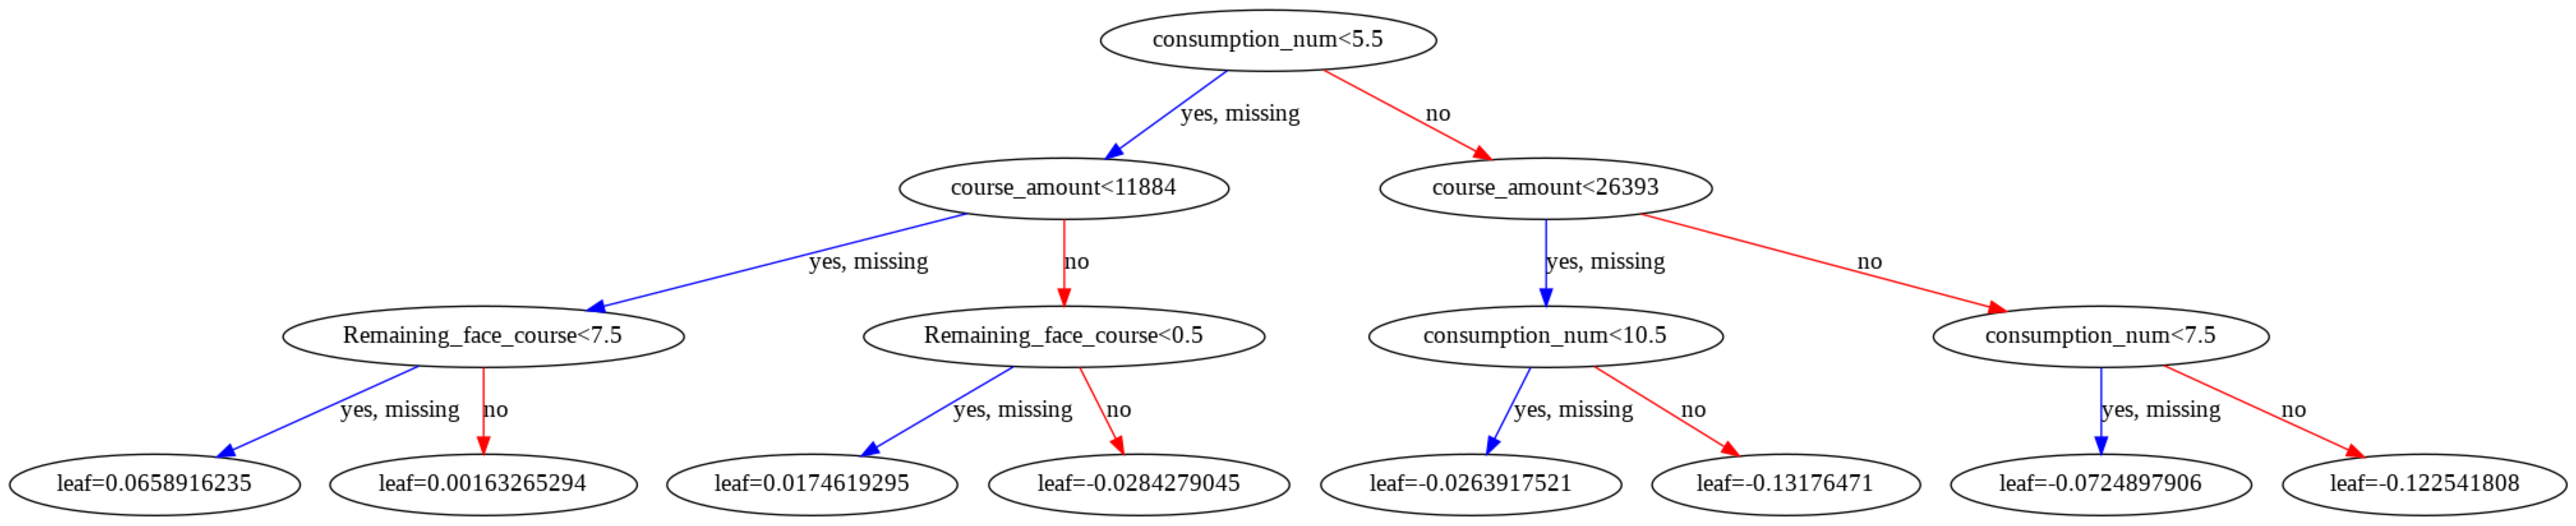

In [ ]:
from xgboost import plot_tree

fig,ax = plt.subplots(figsize=(100,100))
plot_tree(xgb_model,ax=ax)

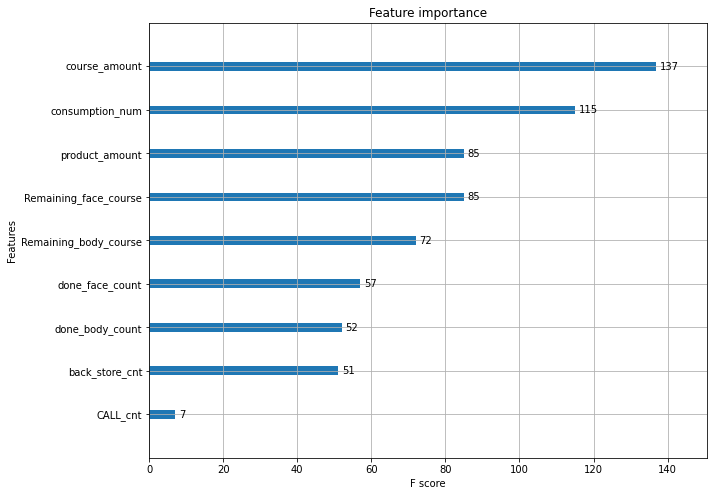

In [ ]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)